## Limpando o dataset para a classificação não supervisionada

In [2]:
import json
import pandas as pd
import numpy as np
import os
import openai
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [3]:
df = pd.read_csv(f'datasets/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01
symmetry_mean,569.0,0.18,3.000000e-02,0.11,0.16,0.18,0.20,3.000000e-01


In [5]:
label_encoder = LabelEncoder()
# Transformar todas as colunas não numéricas em labels
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    label_legend = {index: label for index, label in enumerate(label_encoder.classes_)}
    print(label_legend)

{0: 'B', 1: 'M'}


In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.drop(columns=['id'], inplace=True)

In [8]:
def remover_colunas_correlacionadas(df):
    matrix_corr = df.corr().abs()
    remove_columns = set()

    for i_corr in range(len(matrix_corr.columns)):
        for j_corr in range(i_corr + 1, len(matrix_corr.columns)):
            if matrix_corr.iloc[i_corr, j_corr] > 0.87 and matrix_corr.columns[j_corr] != 'close':
                remove_columns.add(matrix_corr.columns[j_corr])
                print(f"Removendo coluna: {matrix_corr.columns[j_corr]} com correlação: {matrix_corr.iloc[i_corr, j_corr]}")

    return df.drop(columns = remove_columns)

In [9]:
matrix_corr = df.corr().abs()
matrix_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


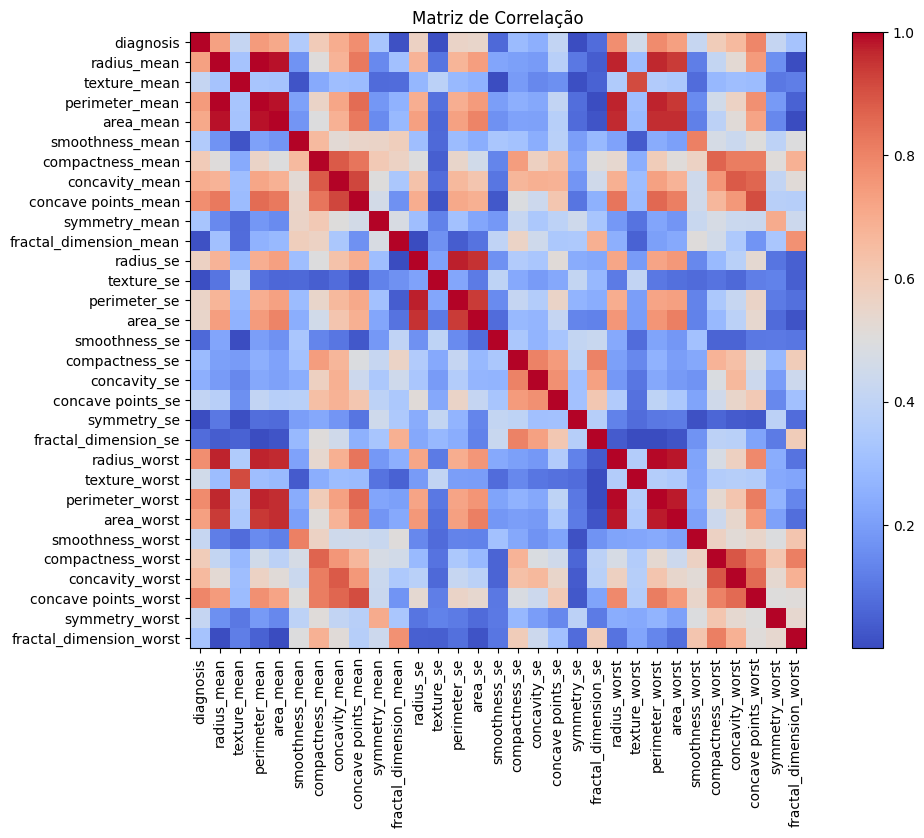

In [10]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o heatmap usando matplotlib
plt.imshow(matrix_corr, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Adicionar rótulos
plt.xticks(range(len(matrix_corr.columns)), matrix_corr.columns, rotation=90)
plt.yticks(range(len(matrix_corr.columns)), matrix_corr.columns)

# Adicionar título
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

In [11]:
df_filtrado = remover_colunas_correlacionadas(df)
df_filtrado.head()

Removendo coluna: perimeter_mean com correlação: 0.9978552814938109
Removendo coluna: area_mean com correlação: 0.9873571700566127
Removendo coluna: radius_worst com correlação: 0.9695389726112055
Removendo coluna: perimeter_worst com correlação: 0.9651365139559871
Removendo coluna: area_worst com correlação: 0.9410824595860461
Removendo coluna: texture_worst com correlação: 0.912044588840421
Removendo coluna: area_mean com correlação: 0.9865068039913907
Removendo coluna: radius_worst com correlação: 0.9694763634663146
Removendo coluna: perimeter_worst com correlação: 0.9703868870426394
Removendo coluna: area_worst com correlação: 0.9415498080023068
Removendo coluna: radius_worst com correlação: 0.9627460860470841
Removendo coluna: perimeter_worst com correlação: 0.9591195743552645
Removendo coluna: area_worst com correlação: 0.9592133256498998
Removendo coluna: concavity_mean com correlação: 0.8831206701772507
Removendo coluna: concave points_mean com correlação: 0.9213910263788588
Re

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.2364,0.07678


In [12]:
data_train = df_filtrado.drop(columns=['diagnosis'])
data_train_np = np.array(data_train)

## Treinando o modelo de classificação

In [90]:
#modelo_unsupervised = KMeans(n_clusters=4, random_state=42)
#modelo_unsupervised.fit(data_train)

In [13]:
gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_model.fit(data_train_np)

GaussianMixture(n_components=2, random_state=42)

In [14]:
cluster_df = data_train

cluster_df['Cluster'] = gmm_model.predict(data_train_np) #modelo_unsupervised.labels_

cluster_0 = cluster_df[cluster_df['Cluster'] == 0]
cluster_1 = cluster_df[cluster_df['Cluster'] == 1]

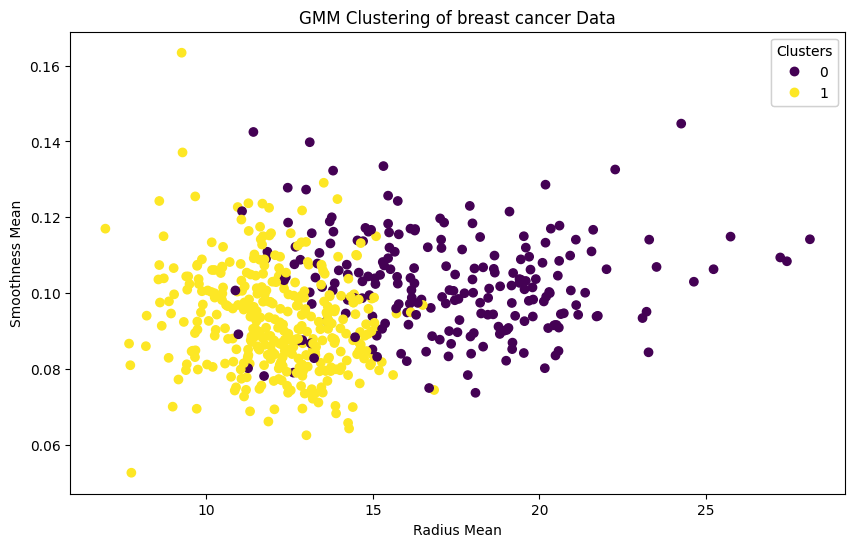

In [16]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_train['radius_mean'], data_train['smoothness_mean'], c=cluster_df['Cluster'], cmap='viridis')

plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')
plt.title('GMM Clustering of breast cancer Data')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

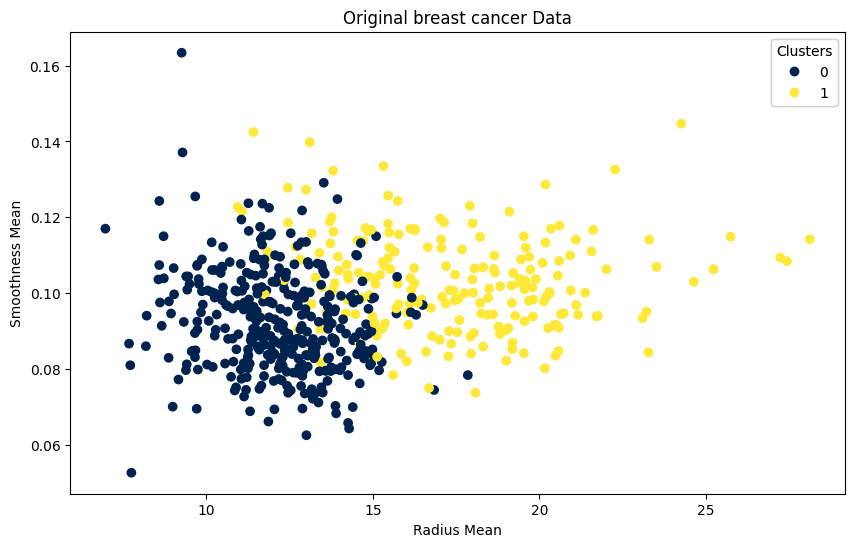

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['radius_mean'], df['smoothness_mean'], c=df['diagnosis'], cmap='cividis')

plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')
plt.title('Original breast cancer Data')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [94]:
cluster_0_json = cluster_0.to_json(orient='records')
cluster_1_json = cluster_1.to_json(orient='records')

In [95]:
cluster_0_json

'[{"radius_mean":17.99,"texture_mean":10.38,"smoothness_mean":0.1184,"compactness_mean":0.2776,"symmetry_mean":0.2419,"fractal_dimension_mean":0.07871,"radius_se":1.095,"texture_se":0.9053,"smoothness_se":0.006399,"compactness_se":0.04904,"concavity_se":0.05373,"concave points_se":0.01587,"symmetry_se":0.03003,"fractal_dimension_se":0.006193,"smoothness_worst":0.1622,"compactness_worst":0.6656,"symmetry_worst":0.4601,"fractal_dimension_worst":0.1189,"Cluster":0},{"radius_mean":20.57,"texture_mean":17.77,"smoothness_mean":0.08474,"compactness_mean":0.07864,"symmetry_mean":0.1812,"fractal_dimension_mean":0.05667,"radius_se":0.5435,"texture_se":0.7339,"smoothness_se":0.005225,"compactness_se":0.01308,"concavity_se":0.0186,"concave points_se":0.0134,"symmetry_se":0.01389,"fractal_dimension_se":0.003532,"smoothness_worst":0.1238,"compactness_worst":0.1866,"symmetry_worst":0.275,"fractal_dimension_worst":0.08902,"Cluster":0},{"radius_mean":19.69,"texture_mean":21.25,"smoothness_mean":0.1096,

In [96]:
client = openai.OpenAI(
    organization='org-8Q6LduybHrpbAdbT9yJUJDQA',
    project='proj_DjkXbEEukpsg44dLeabG1ZyP',
    api_key=os.environ.get('MY_OPENAI_KEY')
)

def generateResponseLLM(model: str, messages: list , max_tokens: int) -> str:
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=max_tokens
    )
    return response.choices[0].message.content

# Configurar a chave da OpenAI (pode ser via variável de ambiente)
OPENAI_API_KEY = os.getenv("MY_OPENAI_KEY")

In [97]:
prompt = f"""
A seguir, apresento a lista das possíveis classificações:

Maligno

Benigno

Além disso, para cada grupo, disponibilizarei os dados no formato JSON conforme o exemplo abaixo:

Grupo 1: {cluster_0_json}

Grupo 2: {cluster_1_json}

O contexto desses dados são para a classificação de câncer de mama, onde cada grupo representa um conjunto de características de pacientes que fizeram o exame para investigar um possível cancer.

Sua tarefa é analisar as características presentes em cada JSON (dados de cada grupo) e, com base nessas informações e na lista de classificações fornecida, atribuir a cada grupo a classificação que melhor o representa, certifique-se de considerar todas as características presentes em cada json, e classificar todos os grupos fornecidos. Para cada grupo, por favor, inclua:

A classificação escolhida.

Uma breve justificativa explicando a relação entre as características do grupo e a classificação atribuída.

Por favor, apresente os resultados da seguinte forma no formato JSON para eu converter diretamente a resposta para um arquivo JSON em python:

    "classificação":
        "cluster_0": label_0,
        "cluster_1": label_1,
        ...

    "justificativa":
        "cluster_0": "justificativa_0",
        "cluster_1": "justificativa_1",
        ...


"""

In [98]:
messages = [
    {
        "role": "system",
        "content": "Você é um especialista em análise de dados e machine learning. Recebi um conjunto de dados que foi segmentado em grupos utilizando um algoritmo de clustering não supervisionado. Cada grupo contém observações com características semelhantes, mas ainda não sabemos a que classificação cada um se encaixa."
    },
    {
        "role": "user",
        "content": prompt
    }
]

In [99]:
resposta_llm = generateResponseLLM('gpt-4o-mini', messages, 5600)
print(resposta_llm)

Com base na análise das características presentes em cada grupo e na lista de classificações fornecidas (Maligno e Benigno), aqui estão as classificações atribuídas a cada grupo, juntamente com suas justificativas.

```json
{
    "classificação": {
        "cluster_0": "Maligno",
        "cluster_1": "Benigno"
    },
    "justificativa": {
        "cluster_0": "O grupo 0 apresenta características que frequentemente estão associadas a tumores malignos, como tamanhos de raio maiores (média de 15-20), maior compactação e irregularidade na forma, assim como variações na simetria e textura que denotam potencial invasão. Este perfil é típico de câncer de mama, que tende a apresentar maiores dimensões e irregularidades, além de uma configuração que pode indicar maior agressividade.",
        "cluster_1": "O grupo 1 inclui características com médias de raio menores (geralmente abaixo de 15), texturas mais homogeneizadas e menor compactação, o que geralmente está relacionado a tumores benignos.

# Resposta do LLM por modelo

## modelo gpt-4o-mini
```json
{
    "classificação": {
        "cluster_0": "Benigno",
        "cluster_1": "Maligno"
    },
    "justificativa": {
        "cluster_0": "Os valores de 'radius_mean', 'smoothness_mean', e 'compactness_mean' são relativamente menores e com variações menores dentro do grupo, o que sugere menos agressividade e características típicas de tumores benignos.",
        "cluster_1": "As características desse grupo apresentam valores de 'radius_mean', 'compactness_mean', e 'concavity_mean' significativamente maiores, indicando que as células têm um padrão mais agressivo e atributos típicos de tumores malignos."
    }
}
```
## modelo gpt-4o


In [100]:
resposta_llm_json = {
    "classificação": {
        "cluster_0": "M",
        "cluster_1": "B"
    },
    "justificativa": {
        "cluster_0": "O grupo 0 apresenta características típicas de tumores malignos, como altos valores em 'radius_mean' (média de raio), 'compactness_mean' (compactação média), 'concavity_mean' (concavidade média) e outros parâmetros que estão geralmente associados a um crescimento tumor maligno. Os dados mostram valores elevados em métricas como 'concave points_mean', que podem indicar a presença de formações mais agressivas.",
        "cluster_1": "O grupo 1, por outro lado, demonstra características associadas a tumores benignos, como valores mais baixos em 'radius_mean', 'smoothness_mean' e 'texture_mean', que estão relacionados a uma estrutura mais homogênea e menos agressiva. As características deste grupo indicam menor risco e potencial agressividade, alinhando-se com zero ou uma baixa presença de câncer."
    }
}

In [101]:
resposta_llm_json['classificação']

{'cluster_0': 'M', 'cluster_1': 'B'}

In [102]:
cluster_classification_llm = []
for i in range(2):
    cluster_classification_llm.append(resposta_llm_json['classificação'][f'cluster_{i}'])

In [103]:
df = remover_colunas_correlacionadas(df)
groups_cluster = []
groups = df.groupby('diagnosis')
for category, group in groups:
    print(f"Category: {category}")
    groups_cluster.append(group)

Removendo coluna: perimeter_mean com correlação: 0.9978552814938109
Removendo coluna: area_mean com correlação: 0.9873571700566127
Removendo coluna: radius_worst com correlação: 0.9695389726112055
Removendo coluna: perimeter_worst com correlação: 0.9651365139559871
Removendo coluna: area_worst com correlação: 0.9410824595860461
Removendo coluna: texture_worst com correlação: 0.912044588840421
Removendo coluna: area_mean com correlação: 0.9865068039913907
Removendo coluna: radius_worst com correlação: 0.9694763634663146
Removendo coluna: perimeter_worst com correlação: 0.9703868870426394
Removendo coluna: area_worst com correlação: 0.9415498080023068
Removendo coluna: radius_worst com correlação: 0.9627460860470841
Removendo coluna: perimeter_worst com correlação: 0.9591195743552645
Removendo coluna: area_worst com correlação: 0.9592133256498998
Removendo coluna: concavity_mean com correlação: 0.8831206701772507
Removendo coluna: concave points_mean com correlação: 0.9213910263788588
Re

In [104]:
print(groups_cluster[0])
print(groups_cluster[1])

     diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
19           0       13.540         14.36          0.09779           0.08129   
20           0       13.080         15.71          0.10750           0.12700   
21           0        9.504         12.44          0.10240           0.06492   
37           0       13.030         18.42          0.08983           0.03766   
46           0        8.196         16.84          0.08600           0.05943   
..         ...          ...           ...              ...               ...   
558          0       14.590         22.68          0.08473           0.13300   
559          0       11.510         23.93          0.09261           0.10210   
560          0       14.050         27.15          0.09929           0.11260   
561          0       11.200         29.37          0.07449           0.03558   
568          0        7.760         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_m

In [105]:
groups_cluster[0]

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,0.09779,0.08129,0.1885,0.05766,0.2699,0.7886,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,0.14400,0.17730,0.2977,0.07259
20,0,13.080,15.71,0.10750,0.12700,0.1967,0.06811,0.1852,0.7477,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,0.13120,0.27760,0.3184,0.08183
21,0,9.504,12.44,0.10240,0.06492,0.1815,0.06905,0.2773,0.9768,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,0.13240,0.11480,0.2450,0.07773
37,0,13.030,18.42,0.08983,0.03766,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,0.09701,0.04619,0.1987,0.06169
46,0,8.196,16.84,0.08600,0.05943,0.1769,0.06503,0.1563,0.9567,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,0.12970,0.13570,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.590,22.68,0.08473,0.13300,0.1454,0.06147,0.2254,1.1080,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,0.10260,0.31710,0.2258,0.08004
559,0,11.510,23.93,0.09261,0.10210,0.1388,0.06570,0.2388,2.9040,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,0.12980,0.25170,0.2112,0.08732
560,0,14.050,27.15,0.09929,0.11260,0.1537,0.06171,0.3645,1.4920,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,0.12410,0.22640,0.2250,0.08321
561,0,11.200,29.37,0.07449,0.03558,0.1060,0.05502,0.3141,3.8960,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,0.09267,0.05494,0.1566,0.05905


In [106]:
cluster_1

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,Cluster
19,13.540,14.36,0.09779,0.08129,0.1885,0.05766,0.2699,0.7886,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,0.14400,0.17730,0.2977,0.07259,1
20,13.080,15.71,0.10750,0.12700,0.1967,0.06811,0.1852,0.7477,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,0.13120,0.27760,0.3184,0.08183,1
21,9.504,12.44,0.10240,0.06492,0.1815,0.06905,0.2773,0.9768,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,0.13240,0.11480,0.2450,0.07773,1
37,13.030,18.42,0.08983,0.03766,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,0.09701,0.04619,0.1987,0.06169,1
40,13.440,21.58,0.08162,0.06031,0.1784,0.05587,0.2385,0.8265,0.003280,0.011020,0.01390,0.006881,0.01380,0.001286,0.10940,0.20430,0.2994,0.07146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,0.08473,0.13300,0.1454,0.06147,0.2254,1.1080,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,0.10260,0.31710,0.2258,0.08004,1
559,11.510,23.93,0.09261,0.10210,0.1388,0.06570,0.2388,2.9040,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,0.12980,0.25170,0.2112,0.08732,1
560,14.050,27.15,0.09929,0.11260,0.1537,0.06171,0.3645,1.4920,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,0.12410,0.22640,0.2250,0.08321,1
561,11.200,29.37,0.07449,0.03558,0.1060,0.05502,0.3141,3.8960,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,0.09267,0.05494,0.1566,0.05905,1


In [107]:
for index in range(1, len(groups_cluster)):
    groups_cluster[index - 1] = groups_cluster[index - 1].drop(columns=['diagnosis'])
    groups_cluster[index - 1].head()

In [108]:
Classification_labels_adjusted = cluster_df['Cluster'].astype(object).copy()

for i in range(len(cluster_df['Cluster'])):
    Classification_labels_adjusted[i] = cluster_classification_llm[cluster_df['Cluster'][i]]

label_encoder = LabelEncoder()
# Transformar todas as colunas não numéricas em labels

Classification_labels_adjusted = label_encoder.fit_transform(Classification_labels_adjusted)
label_legend_cluster = {index: label for index, label in enumerate(label_encoder.classes_)}
print(f'legenda das labels dos clusters: {label_legend_cluster}')
print(f'legenda das labels do dataset: {label_legend}')

legenda das labels dos clusters: {0: 'B', 1: 'M'}
legenda das labels do dataset: {0: 'B', 1: 'M'}


In [111]:
print(Classification_labels_adjusted)
print(df['diagnosis'].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 

In [113]:
ari_score = adjusted_rand_score(df['diagnosis'].values, Classification_labels_adjusted)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")

nmi_score = normalized_mutual_info_score(df['diagnosis'].values, Classification_labels_adjusted)
print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")

Adjusted Rand Index (ARI): 0.77
Normalized Mutual Information (NMI): 0.66


def row_similarity(row1, row2):
    # Retorna 1 se as linhas forem iguais, caso contrário 0
    return 1 if row1.equals(row2) else 0

def remove_tested_lines(df1, df2, row1, row2):
    # Remove as linhas dos dataframes utilizando os índices atuais (após reset)
    if row1.name in df1.index and row2.name in df2.index:
        df1 = df1.drop(index=row1.name).reset_index(drop=True)
        df2 = df2.drop(index=row2.name).reset_index(drop=True)
    return df1, df2

def compare_dataframes(df1, df2):
    similarities = []
    # Reinicia os índices para garantir consistência
    group_1 = df1.copy().reset_index(drop=True)
    group_2 = df2.copy().reset_index(drop=True)

    # Enquanto houver linhas em group_1
    while not group_1.empty:
        row1 = group_1.iloc[0]  # Pega sempre a primeira linha (índice atual)
        found_match = False

        # Procura linha equivalente em group_2
        for j in range(len(group_2)):
            row2 = group_2.iloc[j]
            if row_similarity(row1, row2) == 1:
                similarities.append(1)
                group_1, group_2 = remove_tested_lines(group_1, group_2, row1, row2)
                found_match = True
                break

        # Se não encontrar correspondência, marca como 0 e remove a linha atual de group_1
        if not found_match:
            similarities.append(0)
            group_1 = group_1.drop(index=row1.name).reset_index(drop=True)

    return np.mean(similarities) * 100

In [115]:
def calculate_similarity_percentage(list1, list2):
    # Ensure both lists have the same length
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")

    # Count the number of matching elements
    matching_elements = sum(1 for a, b in zip(list1, list2) if a == b)

    # Calculate the percentage of matching elements
    similarity_percentage = (matching_elements / len(list1)) * 100

    return similarity_percentage

brute_similarity_percentage = calculate_similarity_percentage(df['diagnosis'].values, Classification_labels_adjusted)

print(f'comparação de elemento iguais na classificação de clusters e valores do dataset: {brute_similarity_percentage:.2f}%')

comparação de elemento iguais na classificação de clusters e valores do dataset: 94.02%


## KMeans: 17.650862068965516
## GMM: 2.29%

## GMM (ari_score) breast cancer: 77%
## GMM (nmi_score) breast cancer: 66%
## GMM (similaridade entre os clusters e os valores do dataset) breast cancer: 94.02%